#**CSGO Project**

- Build and compare multiple machine learning algorithmns for the classfication of round winners in the game CSGO.

- Using LDA for selecting the features more important for model building.

**PCA**
- Unsupervised algo
- Regression as well as classification algo
- this algo is used to reduce the dimensions considering the independant features only.

**LDA**
- Supervised algo
- Classification algo only
- this algo is used to reduce the dimensions considers the target column classes and the distinctions between those classes as basis to decide what features to use for model building

**Features** : columns

**Independant features** : dimensions/ input variables

**Dependant feature**  : target

**Target column** -> classified -> yes/no or T/CT or Red/blue (classes)



**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [2]:
df = pd.read_csv('/content/DataCGGO.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


**Analysis and Pre processing**

In [3]:
df.shape

(122410, 97)

In [4]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [6]:
df.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

4962

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [12]:
df['map'].nunique()

8

In [13]:
#plot a bar plot of % of occurance of different maps in data

df['map'].value_counts()

map
de_inferno     22982
de_dust2       21252
de_nuke        18078
de_mirage      17793
de_overpass    13474
de_train       12919
de_vertigo     10805
de_cache         145
Name: count, dtype: int64

In [22]:
counts = df['map'].value_counts()
total = counts.sum()  #total sum
percentage = (counts/total)*100
print(percentage)

# for map_name, count, percent in zip(counts.index, counts.values, percentage.values):
#   print(f'{map_name} percentage is : {percent}')

map
de_inferno     19.567809
de_dust2       18.094816
de_nuke        15.392344
de_mirage      15.149683
de_overpass    11.472311
de_train       10.999762
de_vertigo      9.199816
de_cache        0.123459
Name: count, dtype: float64


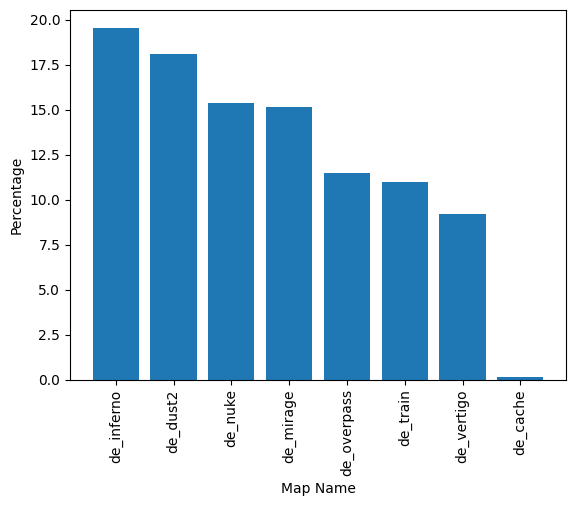

In [24]:
plt.bar(percentage.index, percentage.values)
plt.xticks(rotation = 90)
plt.xlabel('Map Name')
plt.ylabel('Percentage')
plt.show()

**According the plot above, df_inferno is the map mostly occuring in the dataset**

**Pre Processing : Label Encoding**

In [26]:
col = ['map', 'bomb_planted', 'round_winner']

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [29]:
for i in col:
  df[i] = le.fit_transform(df[i])
  # le.fit_transform(df[i], inplace=True)

In [34]:
# df['map'].unique()
df['map'].value_counts()

map
2    22982
1    21252
4    18078
3    17793
5    13474
6    12919
7    10805
0      145
Name: count, dtype: int64

In [32]:
df['bomb_planted'].unique()

array([0, 1])

In [33]:
df['round_winner'].unique()

array([0, 1])

**Pre processing : Standardization**

In [38]:
x = df.iloc[:, :-1]   #inde features [rows, columns except -1]
y = df.iloc[:, -1]    #dep features [rows, -1 column only]

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [41]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train.shape

(93958, 96)

In [45]:
x_test.shape

(23490, 96)

In [46]:
y_train.shape

(93958,)

In [47]:
y_test.shape

(23490,)

**Applying LDA**

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

**LDA Coefficients**

> coef is used to determine the importance of a column in model building

> higher the coef value, the more important the feature is

> used to decide the top features we can use to build the model



In [56]:
ldacoef = np.exp(np.abs(lda.coef_))
ldacoef = ldacoef.flatten()  #is used to convert any dimensional data into 1d
ldacoef.shape

(96,)

In [57]:
df_lda_features = pd.DataFrame()
df_lda_features['Feature_name'] = list(x.columns)
df_lda_features['Coef Value'] = ldacoef
df_lda_features

,Feature_name,Coef Value
0,time_left,1.157275
1,ct_score,1.018161
2,t_score,1.017893
3,map,1.090594
4,bomb_planted,1.271580
...,...,...
91,t_grenade_incendiarygrenade,1.010311
92,ct_grenade_molotovgrenade,1.012270
93,t_grenade_molotovgrenade,1.099038
94,ct_grenade_decoygrenade,1.006165


**Selected Top 20 Features**

In [58]:
new_features_20 = df_lda_features.nlargest(20, 'Coef Value')
new_features_20

,Feature_name,Coef Value
8,t_armor,1.858555
17,t_weapon_ak47,1.843215
7,ct_armor,1.827233
65,t_weapon_sg553,1.757269
40,ct_weapon_m4a4,1.579577
5,ct_health,1.547474
15,t_players_alive,1.496022
6,t_health,1.373508
20,ct_weapon_awp,1.368958
21,t_weapon_awp,1.293358


In [60]:
new_col_20 = list(new_features_20.index)
new_col_20

[8, 17, 7, 65, 40, 5, 15, 6, 20, 21, 89, 4, 64, 14, 9, 18, 16, 87, 35, 10]

In [62]:
x = df.iloc[ : , [8, 17, 7, 65, 40, 5, 15, 6, 20, 21, 89, 4, 64, 14, 9, 18, 16, 87, 35, 10]]
y = df.iloc[ : , -1]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Model Building**

**Logistic Regression**

In [73]:
from sklearn.linear_model import LogisticRegression

lg_m3 = LogisticRegression()
lg_m3.fit(x_train, y_train)

LogisticRegression()

In [74]:
y_pred3 = lg_m3.predict(x_test)
y_pred3

array([1, 1, 0, ..., 1, 1, 0])

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred3)

0.7455512984248617

**Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_m1 = RandomForestClassifier()
rf_m1.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
y_pred1 = rf_m1.predict(x_test)
y_pred1

array([1, 1, 0, ..., 1, 1, 0])

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.8535972754363559

**XGBoost**

In [70]:
import xgboost
xg_m2 = xgboost.XGBClassifier()
xg_m2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred2 = xg_m2.predict(x_test)
y_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred2)

0.7905491698595147